In [496]:
#Exercício 10

## Utilizando COMPRAS e CADASTRO: A tabela COMPRAS possui as 
## informações de todas as compras feitas pelos clientes da sua 
## loja. Em CADASTRO, você encontrará as informações cadastrais dos
## seus clientes. Monte uma nova tabela chamada RESUMO. Essa tabela
## terá uma linha por cliente e as colunas serão os campos: 
## Id, Idade, Estado, Gasto_Total. As primeiras colunas são 
## auto-explicativas e podem ser obtidas diretamente na tabela
## COMPRAS. A última coluna deve trazer a soma de todas as compras
## feitas por cada cliente. Essa tabela é a primeira parte da 
## resposta. A segunda parte será obter a soma, a média e o desvio
## padrão dos gastos por estado. Isto é, qual a soma, a média e o 
## desvio padrão do campo Total_Gasto para cada estado.

In [497]:
import pandas as pd

df1 = pd.read_csv('COMPRAS.csv',delimiter=';')
df2 = pd.read_csv('CADASTRO.csv',delimiter=';')

In [498]:
df1 = df1.drop(columns=['Data_Compra'])

In [499]:
## Limpando e mudando para float
df1.groupby(['Id'],as_index = False ).agg('sum')
df1['Valor_Compra']=df1['Valor_Compra'].str.replace(',', '.')
df1['Valor_Compra']=df1['Valor_Compra'].astype('float')

In [500]:
# alterando o nome
df1['Gasto_Total']=df1['Valor_Compra']
df1 = df1.drop(columns=['Valor_Compra'])

In [501]:
## somando valores por cliente
df1 = df1.groupby('Id').sum()

In [502]:
df1 = df1.reset_index()

In [503]:
## merge nos dois dataframes e tirando os nomes
resumo = pd.merge(df2, df1, on=['Id'])
resumo = resumo.drop(columns=['Nome'])

In [504]:
## tabela resumo criada
resumo

,Id,Idade,Estado,Gasto_Total
0,AA256,32,AM,1858.83
1,AB586,25,MG,487.00
2,CD687,20,GO,147.31
3,TR577,34,GO,867.10
4,FS593,63,BA,930.43
5,DE568,44,AC,923.97
6,TKH854,19,AC,271.01
7,JT587,22,AL,210.27
8,DV468,26,AM,881.88
9,ER999,24,CE,464.50


In [505]:
#tirando as idades
estado = resumo.drop(columns=['Idade'])

In [506]:
## Soma por estado do gasto total
estado.groupby(['Estado']).sum()

,Gasto_Total
Estado,
AC,1194.98
AL,210.27
AM,2740.71
BA,930.43
CE,1631.47
GO,1014.41
MG,487.00


In [507]:
## média por estado do gasto total
estado.groupby(['Estado']).mean()

,Gasto_Total
Estado,
AC,597.490000
AL,210.270000
AM,1370.355000
BA,930.430000
CE,543.823333
GO,507.205000
MG,487.000000


In [509]:
## Desvio padrão por estado do gasto total
estado.groupby(['Estado']).std()

,Gasto_Total
Estado,
AC,461.712444
AL,NaN
AM,690.807970
BA,NaN
CE,134.088842
GO,508.968390
MG,NaN


In [510]:
#Exercício 11

## Utilizando os datasets COMPRA e CADASTRO: Apresente a 
## distribuição dos campos numéricos da tabela RESUMO através
## de um boxplot e um histograma. Coloque legenda dos eixos x e y
## do gráfico.

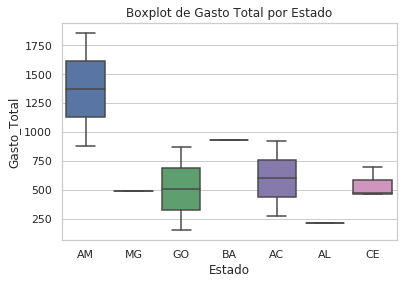

In [511]:
import seaborn as sns

sns.set(style="whitegrid")


##boxplot gasto
ax = sns.boxplot(x="Estado", y="Gasto_Total", data=resumo).set_title('Boxplot de Gasto Total por Estado')


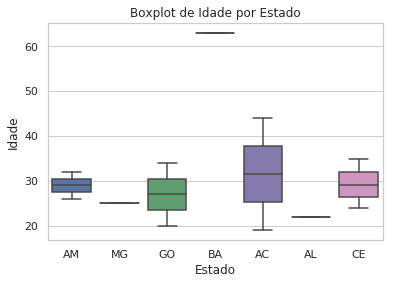

In [512]:
## boxplot idade
ax = sns.boxplot(x="Estado", y="Idade", data=resumo).set_title('Boxplot de Idade por Estado')

Text(0.5, 1.0, 'Histograma da Idade')

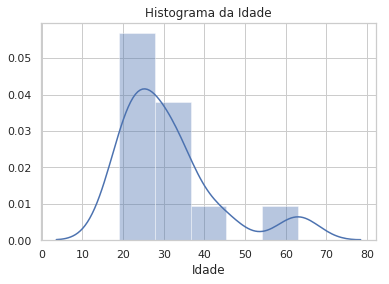

In [513]:
## histograma de Idade
sns.distplot(resumo['Idade']).set_title('Histograma da Idade')

Text(0.5, 1.0, 'Histograma do gasto total')

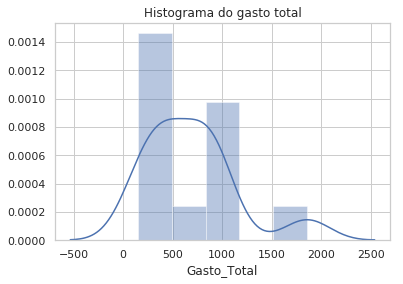

In [514]:
## histograma do gasto
sns.distplot(resumo['Gasto_Total']).set_title('Histograma do gasto total')

In [515]:
## Exercício 12

## Sua empresa considera jovem os clientes com menos de 30 anos.
## A partir disso, elabore um gráfico de barras comparando o gasto
## médio de clientes jovens e velhos. Ou seja, a altura da barra será
## o gasto médio do gasto de cada um dos grupos.

In [520]:
jovem=resumo[resumo['Idade']<30]
jovem['grupo']='jovem'
velho=resumo[resumo['Idade']>=30]
velho['grupo']='velho'

/home/luiza.vieira/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/luiza.vieira/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [524]:
idades = pd.concat([jovem, velho])

In [525]:
idades_mean = idades.groupby(['grupo'],as_index = False ).agg('mean')

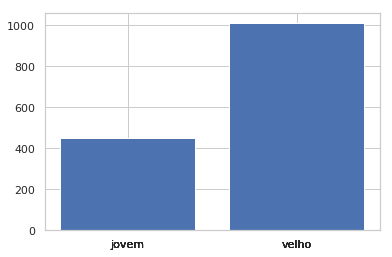

In [531]:
import numpy as np
import matplotlib.pyplot as plt
 

plt.bar(idades_mean.grupo, idades_mean.Gasto_Total)
 
# Create names on the x-axis
plt.xticks(idades.grupo)
 
# Show graphic
plt.show()